# 6.3: Geographical Visualizations with Python

### This script contains the following:

### 1. Importing Visualisations Libraries and Datasets
### 2. Data Wrangling and Grouping of Data
    Extreme values checks
#### 3. Creating the Choropleth Maps
#### 4. Saving Choropleth Maps

# Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os 
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the Europe map 

country_geo = r'/Users/kerimzengin/Desktop/Data Analytics/Data Analytics Immersion/Achievement 6 - Advanced Analytics & Dashboard Design/europe.json'

In [4]:
# To load and check the contents of the .json file

f = open(r'/Users/kerimzengin/Desktop/Data Analytics/Data Analytics Immersion/Achievement 6 - Advanced Analytics & Dashboard Design/europe.json',)
  
# returns JSON object as a dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'scalerank': 1, 'featurecla': 'Admin-0 country', 'labelrank': 4, 'sovereignt': 'Austria', 'sov_a3': 'AUT', 'adm0_dif': 0, 'level': 2, 'type': 'Sovereign country', 'admin': 'Austria', 'adm0_a3': 'AUT', 'geou_dif': 0, 'geounit': 'Austria', 'gu_a3': 'AUT', 'su_dif': 0, 'subunit': 'Austria', 'su_a3': 'AUT', 'brk_diff': 0, 'name': 'Austria', 'name_long': 'Austria', 'brk_a3': 'AUT', 'brk_name': 'Austria', 'brk_group': None, 'abbrev': 'Aust.', 'postal': 'A', 'formal_en': 'Republic of Austria', 'formal_fr': None, 'note_adm0': None, 'note_brk': None, 'name_sort': 'Austria', 'name_alt': None, 'mapcolor7': 3, 'mapcolor8': 1, 'mapcolor9': 3, 'mapcolor13': 4, 'pop_est': 8210281, 'gdp_md_est': 329500, 'pop_year': -99, 'lastcensus': 2011, 'gdp_year': -99, 'economy': '2. Developed region: nonG7', 'income_grp': '1. High income: OECD', 'wikipedia': -99, 'fips_10': None, 'iso_a2': 'AT', 'iso_a3': 'AUT', 'iso_n3': '040', 'un_a3': '040', 'wb_a2': 'AT', 'wb_a3': 'AUT', 'wo

In [5]:
#Import the cleaned bank pickle file

df_bank = pd.read_pickle(os.path.join(r'/Users/kerimzengin/Desktop/Data Analytics/Data Analytics Immersion/Achievement 6 - Advanced Analytics & Dashboard Design/Data/Prepared Data/bank_cleaned_2.pkl'))

In [6]:
#Check the first 5 records of df_bank

df_bank.head()

,age,job,marital,country,education,has_default_loan,has_housing_loan,has_personal_loan,contact_type,month/year,...,campaign,num_of_days_last_contact,num_of_contacts_before_campaign,previous_campaign_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_3_mths,num_of_employees,has_term_deposit
0,56,housemaid,married,spain,basic.4y,no,no,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,estonia,high.school,unknown,no,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,2.133,5191.0,no
2,37,services,married,austria,high.school,no,yes,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,lithuania,basic.6y,no,no,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,2.132,5191.0,no
4,56,services,married,slovakia,high.school,no,no,yes,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,3.579,5191.0,no


In [7]:
#Check the number of rows and columns of df_bank

df_bank.shape

(41188, 21)

# Data Wrangling and Grouping of Data

In [8]:
#To make all countries' first letter upper case, in order to match the same format within the .json file

df_bank['country'] = df_bank['country'].str.title()

In [9]:
#round the decimal points to 1 place for the euribor_3_mths column

df_bank['euribor_3_mths'] = round(df_bank['euribor_3_mths'], 1)

In [10]:
#Checking if the round function worked

df_bank.head()

,age,job,marital,country,education,has_default_loan,has_housing_loan,has_personal_loan,contact_type,month/year,...,campaign,num_of_days_last_contact,num_of_contacts_before_campaign,previous_campaign_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_3_mths,num_of_employees,has_term_deposit
0,56,housemaid,married,Spain,basic.4y,no,no,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.9,5191.0,no
1,57,services,married,Estonia,high.school,unknown,no,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,2.1,5191.0,no
2,37,services,married,Austria,high.school,no,yes,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.9,5191.0,no
3,40,admin.,married,Lithuania,basic.6y,no,no,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,2.1,5191.0,no
4,56,services,married,Slovakia,high.school,no,no,yes,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,3.6,5191.0,no


In [11]:
#Create an average_euribor column with the average amount from the euribor_3_mths columns and group them by their countries.

df_bank['average_euribor'] = df_bank.groupby(['country'])['euribor_3_mths'].transform(np.mean)

In [12]:
#round the decimal points to 1 place for the average_euribor column

df_bank['average_euribor'] = round(df_bank['average_euribor'], 1)

In [13]:
#Create an average_employee column with the average amount from the num_of_employees columns and group them by their countries.

df_bank['average_employee'] = df_bank.groupby(['country'])['num_of_employees'].transform(np.mean)

In [14]:
#Check if the newly created average columns exists

df_bank.head()

,age,job,marital,country,education,has_default_loan,has_housing_loan,has_personal_loan,contact_type,month/year,...,num_of_contacts_before_campaign,previous_campaign_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_3_mths,num_of_employees,has_term_deposit,average_euribor,average_employee
0,56,housemaid,married,Spain,basic.4y,no,no,no,telephone,2018-05,...,0,nonexistent,1.1,93.994,-36.4,4.9,5191.0,no,3.7,5166.965184
1,57,services,married,Estonia,high.school,unknown,no,no,telephone,2018-05,...,0,nonexistent,1.1,93.994,-36.4,2.1,5191.0,no,1.8,5166.194414
2,37,services,married,Austria,high.school,no,yes,no,telephone,2018-05,...,0,nonexistent,1.1,93.994,-36.4,4.9,5191.0,no,3.6,5166.390502
3,40,admin.,married,Lithuania,basic.6y,no,no,no,telephone,2018-05,...,0,nonexistent,1.1,93.994,-36.4,2.1,5191.0,no,1.8,5166.153070
4,56,services,married,Slovakia,high.school,no,no,yes,telephone,2018-05,...,0,nonexistent,1.1,93.994,-36.4,3.6,5191.0,no,2.8,5168.128448


### Extreme values checks

<AxesSubplot:xlabel='average_euribor', ylabel='Count'>

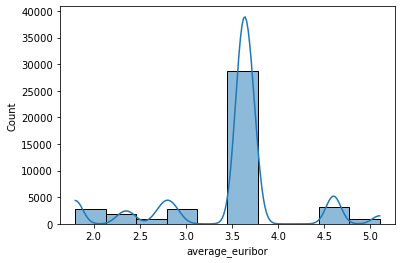

In [15]:
# Create a histogram for the average_euribor column

sns.histplot(data = df_bank['average_euribor'], bins=10, kde = True)

# Creating the Choropleth Maps

In [16]:
# Create a subset with just the countries and the values for average euribor rate we want plotted

avg_euribor_data = df_bank[['country', 'average_euribor']]

In [17]:
# Setup a folium map at a high-level zoom

avg_euribor_map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Create a choropleth map with the variables of country and average euribor rate

choropleth = folium.Choropleth(
    geo_data = country_geo, 
    data = avg_euribor_data,
    columns = ['country', 'average_euribor'],
    key_on = 'feature.properties.name_long',
    fill_color = 'RdYlGn', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "average_euribor").add_to(avg_euribor_map)

#adds a tooltip showing the name of country when mouse is hovered over that country

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name_long'], style=style_function, labels=False))

folium.LayerControl().add_to(avg_euribor_map)

In [18]:
#Displays the map

avg_euribor_map

Looking at the Choropleth graph for the average Euribor 3 months interest rate, there are 3 countries (in dark green) that stand out in terms of offering high interest rates countries for term deposits, so I would still assume clients from these countries have a higher likliness of subscribing to a term deposit compared to than countries, that are in orange or red, which offer a lower interest rate. Deeper analysis would be needed to determine if my hypothesis is true.

# Saving Choropleth Maps

In [19]:
avg_euribor_map.save('avg_euribor_map.html')